# Exploratory Data Analysis
Exploratory Data Analysis is a crucial step in understanding our dataset and making informed decisions about feature engineering, model selection, and more.

## Objective
- Create visualizations to explore the dataset, provide insights through various graphs, and draw conclusions after each analysis step. Identify patterns within the data and suggest potential feature engineering opportunities.

In [2]:
import numpy as np 
import pandas as pd

In [3]:
df = pd.read_csv('mushroom.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,...,white,white,partial,white,one,pendant,black,scattered,urban,p
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,...,white,white,partial,white,one,pendant,brown,numerous,grasses,e
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,...,white,white,partial,white,one,pendant,brown,numerous,meadows,e
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,...,white,white,partial,white,one,pendant,black,scattered,urban,p
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,...,white,white,partial,white,one,evanescent,brown,abundant,grasses,e


In [4]:
df.shape

(8124, 23)

In [5]:
df.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,convex,scaly,brown,no,none,free,close,broad,buff,tapering,...,white,white,partial,white,one,pendant,white,several,woods,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

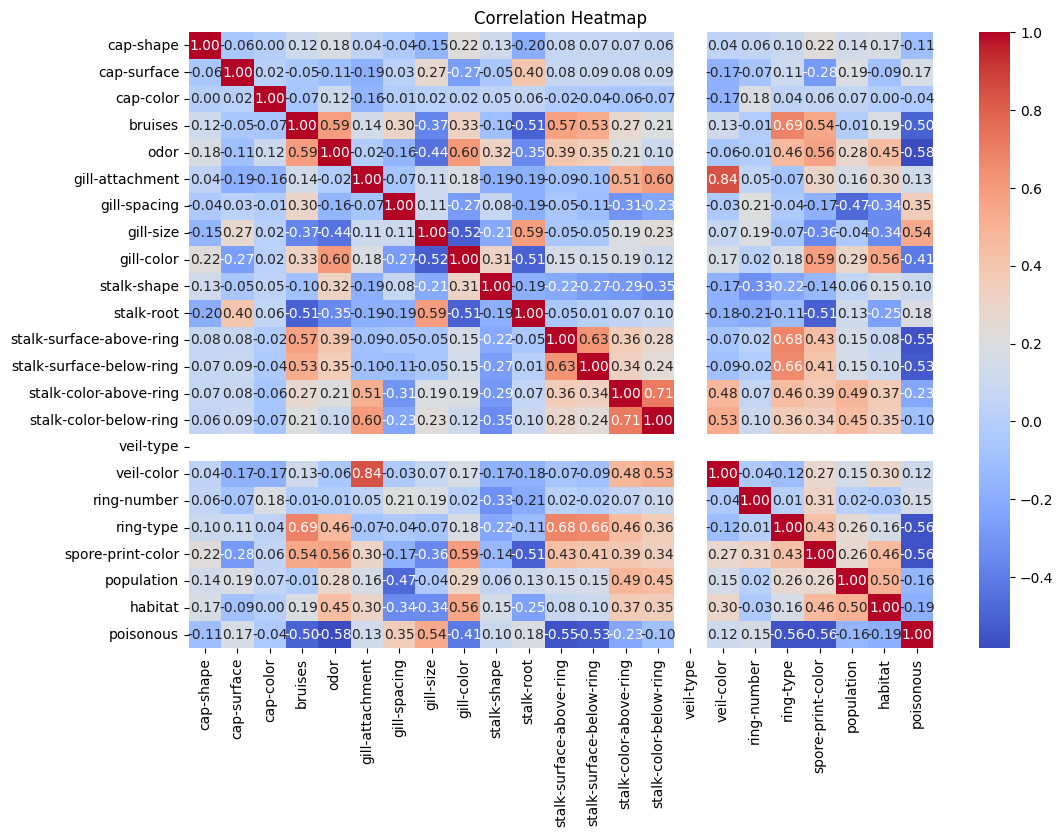

In [45]:
# Encode categorical variables
df_encoded = df.apply(lambda x: pd.factorize(x)[0])

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap')
plt.show()

### Observations

- ring type is highly correlated with bruises, stalk-surfate-above-ring, stalk-surfate-below-ring
- veil-color is highly correlated with gill-attachment

- poisoinous is correlated with odor

## Univariate Analysis

In [8]:
df.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'poisonous'],
      dtype='object')

<Figure size 1000x600 with 0 Axes>

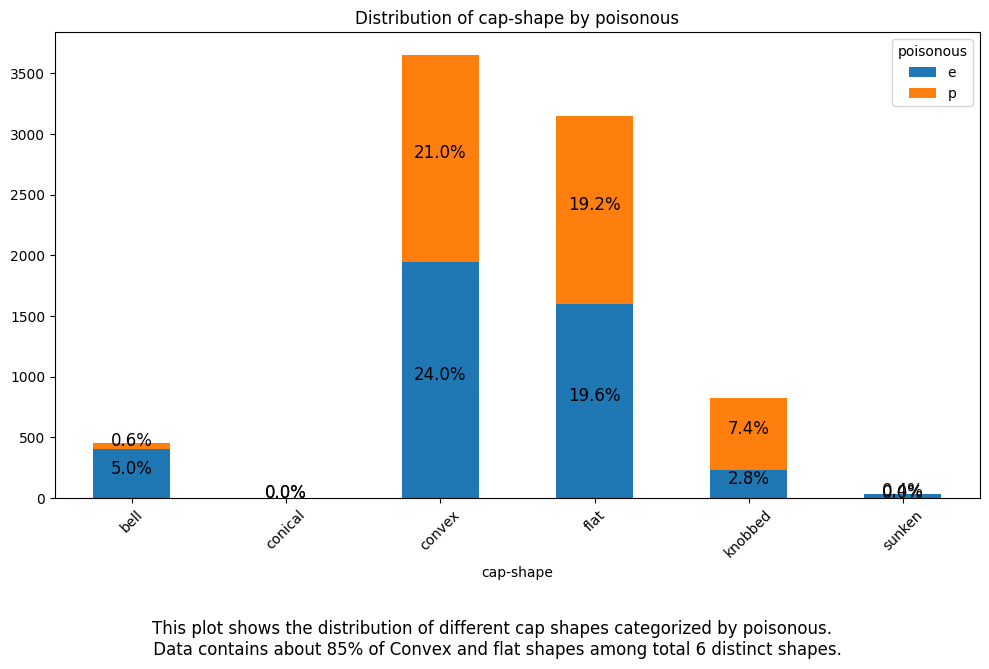

In [32]:
plt.figure(figsize=(10, 6))

grouped_data = df.groupby(['cap-shape', 'poisonous']).size().unstack(fill_value=0)

ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

plt.title('Distribution of cap-shape by poisonous')
plt.xticks(rotation=45)

total = len(df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, p.get_y() + height / 2, f'{100 * height / total:.1f}%', ha='center', fontsize=12)

plt.figtext(0.5, -0.1, 'This plot shows the distribution of different cap shapes categorized by poisonous. \n Data contains about 85% of Convex and flat shapes among total 6 distinct shapes.', ha='center', fontsize=12)

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

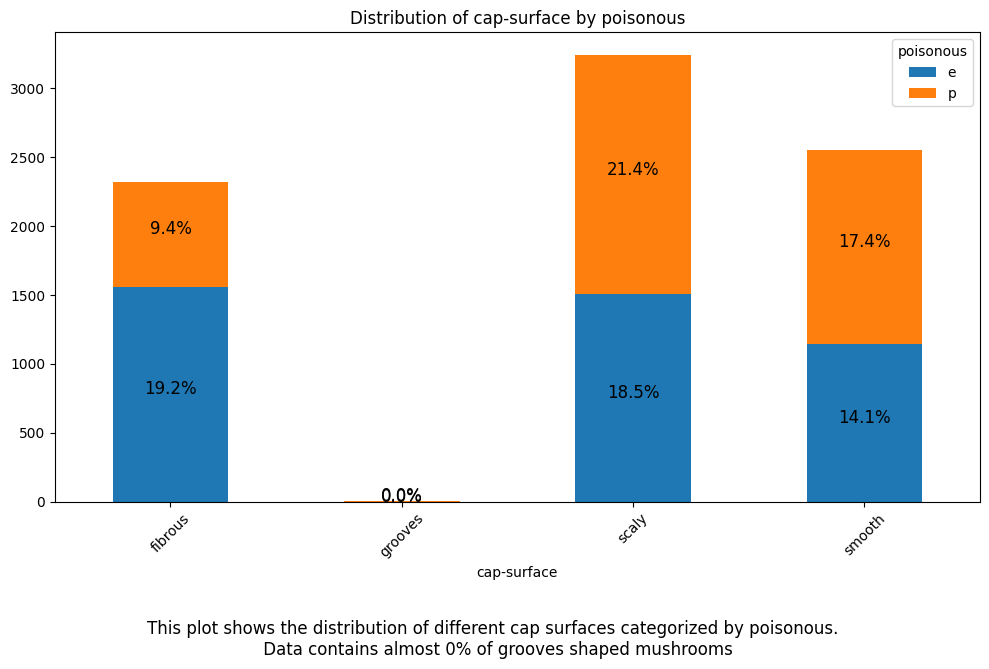

In [36]:
plt.figure(figsize=(10, 6))

grouped_data = df.groupby(['cap-surface', 'poisonous']).size().unstack(fill_value=0)

ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

plt.title('Distribution of cap-surface by poisonous')
plt.xticks(rotation=45)

total = len(df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, p.get_y() + height / 2, f'{100 * height / total:.1f}%', ha='center', fontsize=12)

plt.figtext(0.5, -0.1, 'This plot shows the distribution of different cap surfaces categorized by poisonous. \n Data contains almost 0% of grooves shaped mushrooms', ha='center', fontsize=12)

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

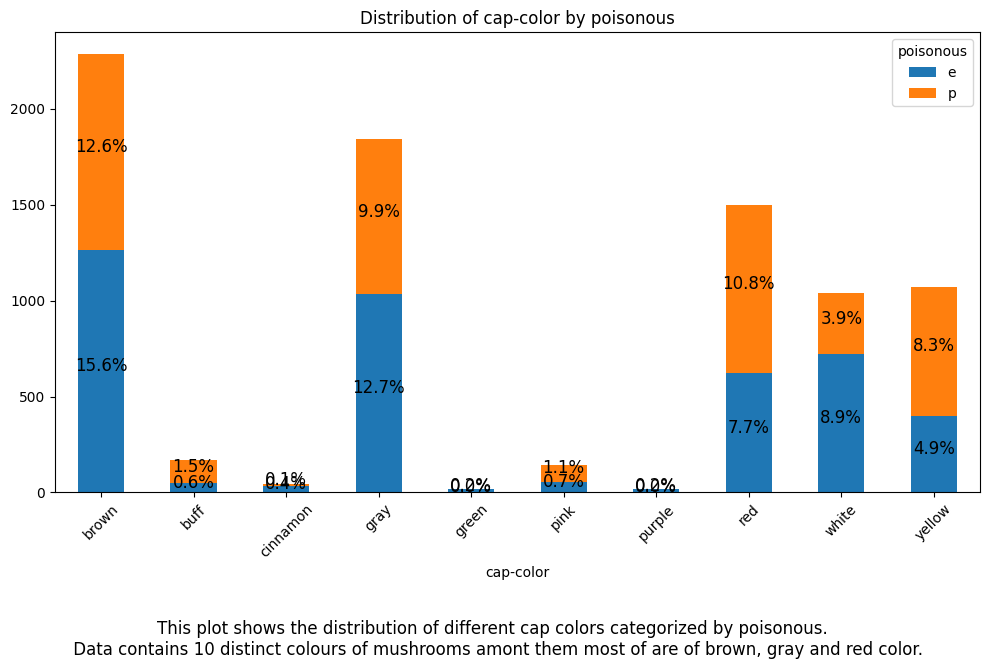

In [38]:
plt.figure(figsize=(10, 6))

grouped_data = df.groupby(['cap-color', 'poisonous']).size().unstack(fill_value=0)

ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

plt.title('Distribution of cap-color by poisonous')
plt.xticks(rotation=45)

total = len(df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, p.get_y() + height / 2, f'{100 * height / total:.1f}%', ha='center', fontsize=12)

plt.figtext(0.5, -0.1, 'This plot shows the distribution of different cap colors categorized by poisonous. \n Data contains 10 distinct colours of mushrooms amont them most of are of brown, gray and red color.', ha='center', fontsize=12)

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

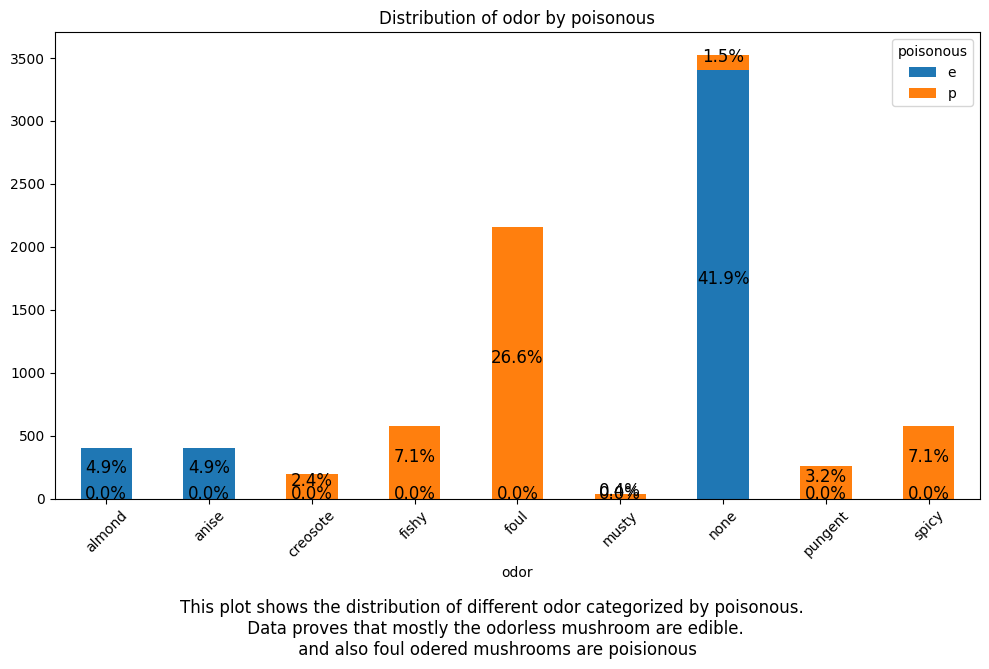

In [41]:
plt.figure(figsize=(10, 6))

grouped_data = df.groupby(['odor', 'poisonous']).size().unstack(fill_value=0)

ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

plt.title('Distribution of odor by poisonous')
plt.xticks(rotation=45)

total = len(df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, p.get_y() + height / 2, f'{100 * height / total:.1f}%', ha='center', fontsize=12)

plt.figtext(0.5, -0.1, 'This plot shows the distribution of different odor categorized by poisonous. \n Data proves that mostly the odorless mushroom are edible. \n and also foul odered mushrooms are poisionous', ha='center', fontsize=12)

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

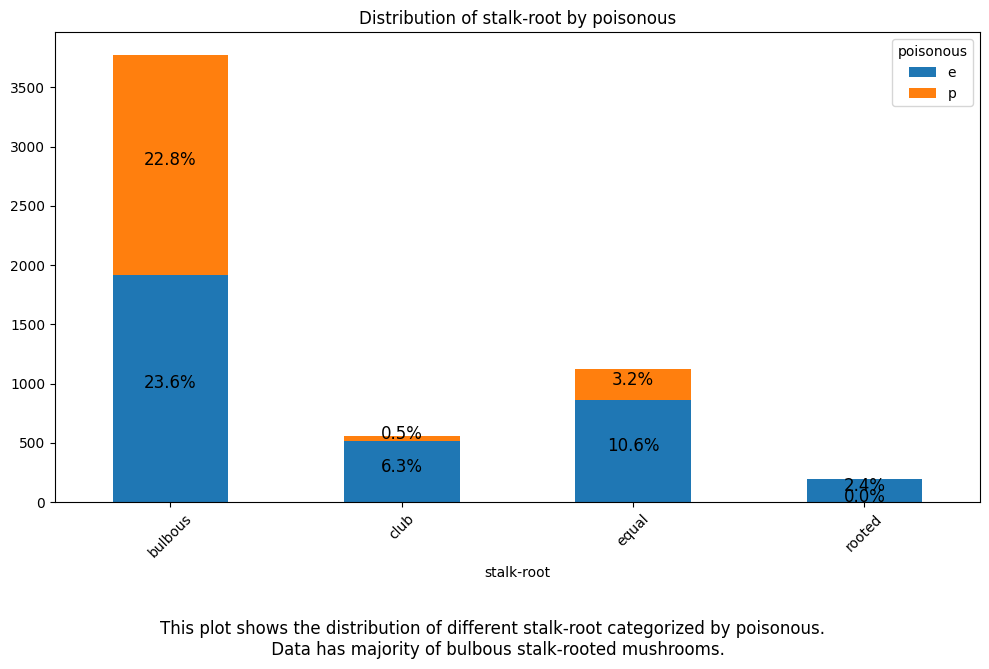

In [43]:
plt.figure(figsize=(10, 6))

grouped_data = df.groupby(['stalk-root', 'poisonous']).size().unstack(fill_value=0)

ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

plt.title('Distribution of stalk-root by poisonous')
plt.xticks(rotation=45)

total = len(df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, p.get_y() + height / 2, f'{100 * height / total:.1f}%', ha='center', fontsize=12)

plt.figtext(0.5, -0.1, 'This plot shows the distribution of different stalk-root categorized by poisonous. \n Data has majority of bulbous stalk-rooted mushrooms.', ha='center', fontsize=12)

plt.tight_layout()
plt.show()


## Identifying Feature Importance

Accuracy: 1.0


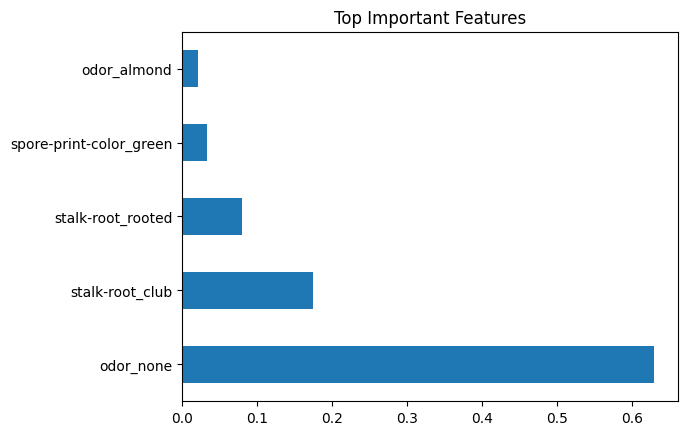

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Convert categorical variables to dummy/indicator variables
df_encoded = pd.get_dummies(df.drop('poisonous', axis=1))
X = df_encoded
y = df['poisonous'].apply(lambda x: 1 if x == 'p' else 0)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Feature importance
feature_importances = pd.Series(clf.feature_importances_, index=df_encoded.columns)
feature_importances.nlargest(5).plot(kind='barh')
plt.title('Top Important Features')
plt.show()


## Important Features

- Top 3 features to classify that whether the mushroom is poisionous
    - odor
    - stalk-root
    - spore-print